In [4]:
from scipy.integrate import quad

In [5]:
import TMQGP as tm
from numpy import *

In [6]:
import QuarkTM

In [7]:
import matplotlib
matplotlib.style.use('publication23')

In [8]:
mQ = 0.6

In [9]:
tm.Efirst_k_integral

<function TMQGP.Efirst_k_integral(om, p, T, iImT, iImG, eps1, eps2, debug, l)>

In [10]:
qrange = linspace(0, 5, 51)
erange = linspace(-5, 5, 201)

In [11]:
qrange_hi = linspace(0, 5, 151)
erange_hi = linspace(-5, 5, 501)

In [12]:
pt = QuarkTM.Particle(mQ, qrange, erange, eps=5e-2)
pt_hi = QuarkTM.Particle(mQ, qrange_hi, erange_hi, eps=5e-2)

In [13]:
T = 0.2

In [14]:
ch = QuarkTM.Channel(pt, pt, T)
ch_hi = QuarkTM.Channel(pt_hi, pt_hi, T)

## Check the 2-particle propagator

In [15]:
def delta(e, e0, eps=1e-2):
    return -1/pi * imag(1 / (e - e0 + eps*1j))

In [16]:
def f(x):
    return 1 / (exp(x/ T) + 1)

In [17]:
ImG2_an = -pi*(1 - f(pt.om0(0)) - f(erange - pt.om0(0))) * delta(erange, 2*pt.om0(0), eps=2*pt.eps)

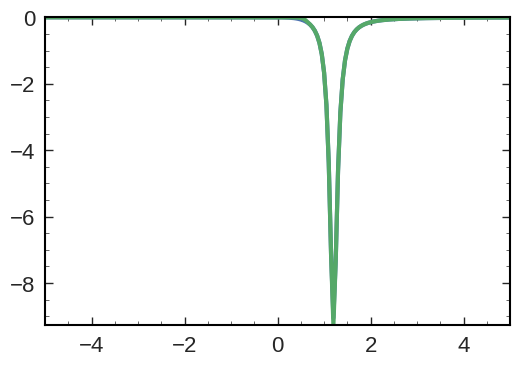

In [18]:
plt.plot(erange, ImG2_an)
plt.plot(erange, imag(ch.G2[:, 0]))

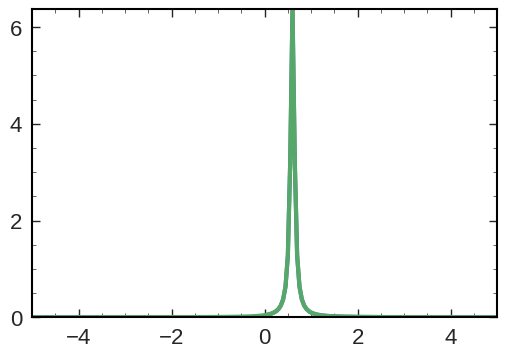

In [19]:
plt.plot(erange, -1/pi*imag(pt.G0(erange, 0)))
plt.plot(erange, delta(erange, pt.om0(0), eps=pt.eps))

## Check the T-matrix solution in the case of no pole

In [20]:
ch.populate_T()

In [21]:
ch_hi.populate_T()

In [22]:
k0 = nan_to_num(sqrt(erange**2/4 - mQ**2)) * (erange/2 > mQ)

/tmp/ipykernel_7119/1595745807.py:1: RuntimeWarning: invalid value encountered in sqrt
  k0 = nan_to_num(sqrt(erange**2/4 - mQ**2)) * (erange/2 > mQ)


In [23]:
ImX_an = pi/pi * k0**2 * ch.v(k0)**2 * (1 - 2*f(erange/2))

What about the real part of $X(E)$?

In [24]:
iImX = interp1d(erange, ImX_an, kind='cubic', bounds_error=0, fill_value=0)

In [25]:
iImX(0.4)

array(-2.97873878e-27)

In [26]:
ReX = array([quad(lambda z: iImX(z), -5.1, 5.1, weight='cauchy', wvar=e)[0]/pi for e in erange])

/tmp/ipykernel_7119/2942079955.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ReX = array([quad(lambda z: iImX(z), -5.1, 5.1, weight='cauchy', wvar=e)[0]/pi for e in erange])


Plot it:

(-0.01, 0.01)

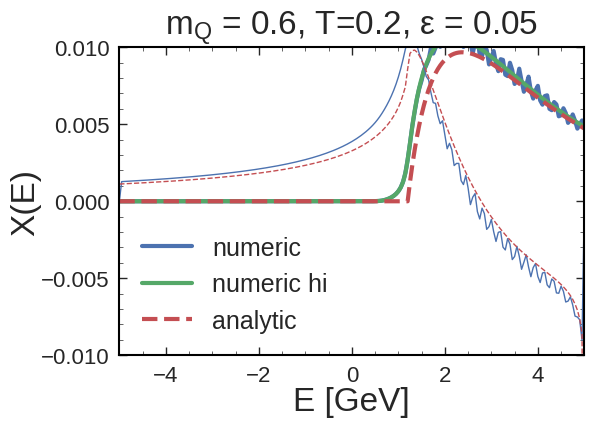

In [27]:
l_num, = plt.plot(erange, imag(ch.XS[0][:, 0]), label='numeric')
plt.plot(erange_hi, imag(ch_hi.XS[0][:, 0]), label='numeric hi')
plt.plot(erange, real(ch.XS[0][:, 0]), lw=1, c=l_num.get_c())
l_an, = plt.plot(erange, ImX_an, label='analytic', ls='--')
plt.plot(erange, ReX, lw=1, c=l_an.get_c(), ls='--')

plt.legend()
plt.title(rf'$m_Q$ = {mQ}, T={T}, $\varepsilon$ = {pt.eps}')

plt.ylabel("X(E)")
plt.xlabel('E [GeV]')

plt.ylim(-0.01, 0.01)
# plt.savefig('X_E.pdf', bbox_inches='tight')

## Try to improve integration for low resolution

In [28]:
from scipy.interpolate import interp2d

In [29]:
from scipy.optimize import minimize

In [30]:
g2 = (ch.ImG2 * 1j + ch.ReG2)

/tmp/ipykernel_7119/1117282221.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(real(1/g2))
/tmp/ipykernel_7119/1117282221.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(real(1/g2))
/tmp/ipykernel_7119/1117282221.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(imag(1/g2))
/tmp/ipykernel_7119/1117282221.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(imag(1/g2))


(-1.0, 1.0)

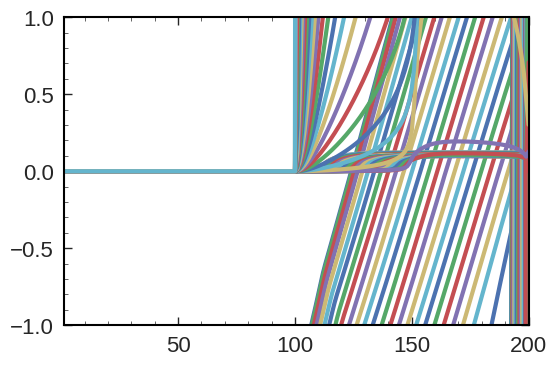

In [31]:
plt.plot(real(1/g2))
plt.plot(imag(1/g2))
plt.ylim(-1, 1)

In [1]:
def ImX(om):
    func = lambda z: -2/pi * z**2 * ch.iImG2(z, om) * ch.v(z)**2

    ### find the peak position
    x_min = minimize(lambda z: ch.iImG2(z[0], om), mQ, bounds=[[0, 5]])
    # print(x_min)

    # width = 2*iImG2
    
    return quad(func, 0, 1)[0] + quad(func, 1, 5)[0]

In [2]:
def ImX_hi(om):
    func = lambda z: -2/pi * z**2 * ch_hi.iImG2(z, om) * ch.v(z)**2

    ### find the peak position
    x_min = minimize(lambda z: ch.iImG2(z[0], om), mQ, bounds=[[0, 5]])
    # print(x_min)

    # width = 2*iImG2
    
    return quad(func, 0, 1)[0] + quad(func, 1, 5)[0]

In [3]:
iImG2_inv = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(1/g2)))

NameError: name 'tm' is not defined

In [32]:
iReG2_inv = tm.Interpolator2D(qrange, erange, ascontiguousarray(real(1/g2)))

In [33]:
def iImG2_fromInv(q, z):
    return -iImG2_inv(q, z) / (iImG2_inv(q, z)**2 + iReG2_inv(q, z)**2 )

In [37]:
def ImX_inv(om):
    func = lambda z: -2/pi * z**2 * iImG2_fromInv(z, om) * ch.v(z)**2

    ### find the peak position
    # x_min = minimize(lambda z: ch.iImG2(z[0], om), mQ, bounds=[[0, 5]])
    # print(x_min)

    # width = 2*iImG2
    
    return quad(func, 0, 1)[0] + quad(func, 1, 5)[0]

In [38]:
qrange_dense = linspace(0, 5, 500)

NameError: name 'iImG2_fromInv' is not defined

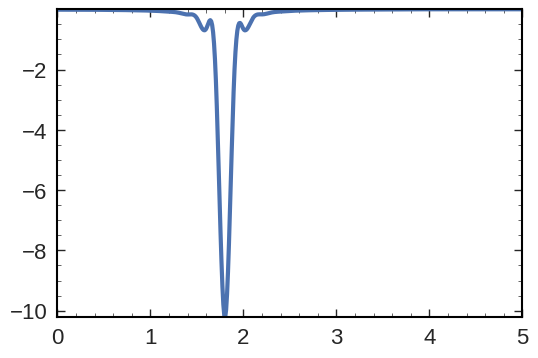

In [39]:
plt.plot(qrange_dense, [ch.iImG2(q, 3.8) for q in qrange_dense])
plt.plot(qrange_dense, [iImG2_fromInv(q, 3.8) for q in qrange_dense])
plt.plot(qrange_dense, [ch_hi.iImG2(q, 3.8) for q in qrange_dense], ls=':')
# plt.plot(qrange_dense, [iReG2_inv(q, 1.8) for q in qrange_dense])

plt.xlim(0, 2)

In [40]:
ImX(0.5)

9.320178568400311e-06

In [41]:
ImX_py = array([ImX(z) for z in erange])

In [42]:
ImX_py_hi = array([ImX_hi(z) for z in erange])

In [43]:
ImX_py_inv = array([ImX_inv(z) for z in erange])

NameError: name 'iImG2_fromInv' is not defined

NameError: name 'ImX_py_inv' is not defined

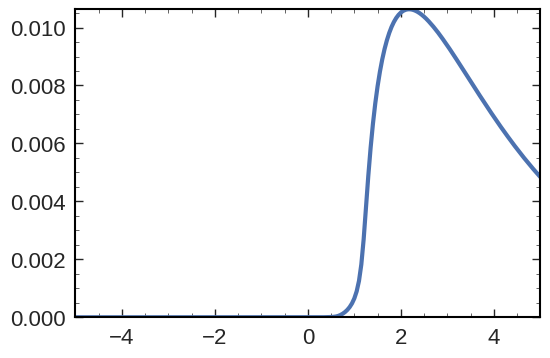

In [44]:
plt.plot(erange, ImX_py_hi)
plt.plot(erange, ImX_py_inv)

## Test `InterDenom2D`

In [42]:
tm.Interpolator2D()

<TMQGP.Interpolator2D; proxy of <Swig Object of type 'Interpolator2D *' at 0x7f4e615f5410> >

In [44]:
iInv = tm.InterDenom2D(qrange, erange, ascontiguousarray(real(1/g2)), ascontiguousarray(imag(1/g2)))

In [45]:
iInv(0.5, 0.5)

-0.01850673051782834

In [48]:
xs1 = array([tm.x_solve(e, 0, 0, 0.2, ch.iVS[0], ch.iOm, iInv, iInv, 5, 1, 1) for e in erange])

In [55]:
xs0 = array([tm.x_solve(e, 0, 0, 0.2, ch.iVS[0], ch.iOm, ch.iImG2, ch.iImG2, 5, 1, 1) for e in erange])

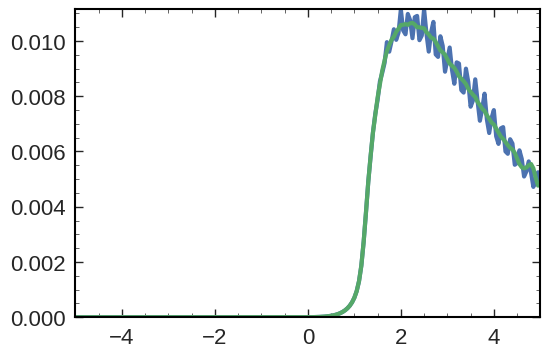

In [56]:
plt.plot(erange, xs0)
plt.plot(erange, xs1)